In [1]:
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from tqdm.autonotebook import tqdm

from Functions import *


/home/agostini/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


## Calibrazione

In [2]:
data_path = "../data/"
calibration_files = glob(data_path+"calibration/*")

### Run 1

#### Reading data

In [45]:
data_file = calibration_files[0]
# list to store important information about each event
Ev_list = []
# residuals from good events fit
Ev_residuals = []
# x position of the best combinations of points per chamber
X_position = {"up" : [], "down" : []}
# local fit differences between chambers
lf_diff = {"slope" : [], "intercept" : []}
# total number of events in the run
tot_ev = 0
# number of accepted events in the run
selected_ev = 0

# get total number of events to dispaly a nice status bar
with open(data_file) as f:
    tot_ev = len(list(f))

# loop over events and perform analysis
with open(data_file) as f:
    with tqdm(total=tot_ev) as pbar:
        for line in f:
            # read event
            ev, evNum, hits = Read_Data(line)
            # select event
            sel, chambers, n_layers = Select_Events_Calibration(ev, hits)
            
            # if selected update the counter and perform former analysis (fit)
            if sel: 
                selected_ev += 1
                #Local linear fit
                lf_results = Local_Fit(ev, chambers, n_layers, exclusion_layer=1)
                #Global linear fit
                gf_results = Global_Fit(ev, chambers, lf_results)
                Ev_residuals.append(gf_results["residuals"])

                # x coordinates for the points in the optimal combination after local fit per chamber
                for x in lf_results[0]["optimal_comb"]:
                    X_position["up"]  .append(x[1])
                for x in lf_results[1]["optimal_comb"]:
                    X_position["down"].append(x[1])
                
                # local fit differences
                lf_diff["slope"]    .append(lf_results[0]["slope"]    -lf_results[1]["slope"])
                lf_diff["intercept"].append(lf_results[0]["intercept"]-lf_results[1]["intercept"])

            # save most important information, in order to plot or reperform the analysis
            # without reading the whole file again
            Ev_list.append(
                {
                    "Number"    : evNum,
                    "Dataframe" : ev,
                    "Hits"      : hits,
                    "Accepted"  : sel,
                    "Chambers"  : chambers,
                    "Layers"    : n_layers
                }
            )

            pbar.update()
            
print("{:35} = {:d}"    .format("Total number of events in the Run", tot_ev))
print("{:35} = {:d}"    .format("Number of accepted events"        , selected_ev))
print("{:35} = {:.4f} %".format("Fraction of accepted events"      , selected_ev/tot_ev*100))


Total number of events in the Run   = 8182
Number of accepted events           = 2237
Fraction of accepted events         = 27.3405 %


#### Hit position

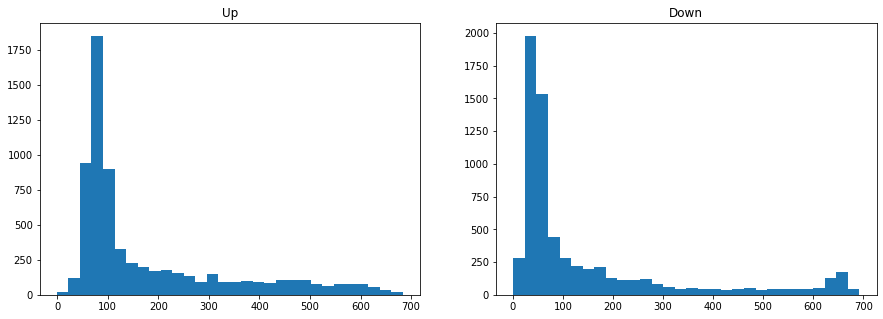

In [46]:
fig, (ax_up, ax_down) = plt.subplots(figsize=(15,5), ncols=2)

ax_up.set_title("Up")
ax_up.hist(X_position["up"], bins=30)

ax_down.set_title("Down")
ax_down.hist(X_position["down"], bins=30)

plt.show()

#### Difference in slope and intercept between chambers

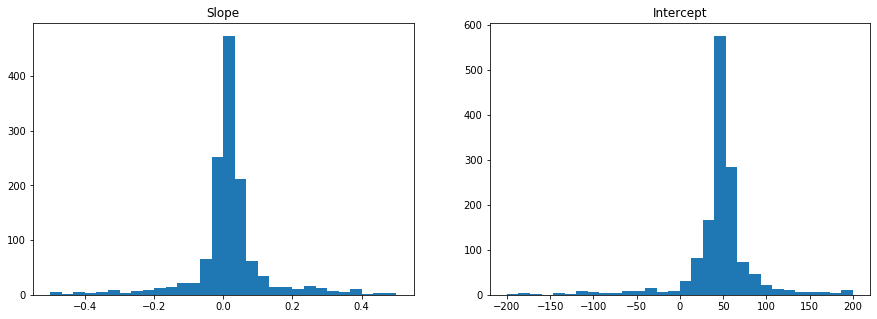

In [16]:
# histogram with the distribution of hits numbers
fig, (ax_s, ax_i) = plt.subplots(figsize=(15,5), ncols=2)

ax_s.set_title("Slope")
ax_s.hist(lf_diff["slope"], bins=30, range=(-0.5,0.5))

ax_i.set_title("Intercept")
ax_i.hist(lf_diff["intercept"], bins=30, range=(-200,200))

plt.show()

In [25]:
lf_results = Local_Fit(Ev_list[100]["Dataframe"], Ev_list[100]["Chambers"], Ev_list[100]["Layers"], exclusion_layer=1)

In [44]:
print(x for x in lf_results[0]["optimal_comb"])

SyntaxError: invalid syntax (<ipython-input-44-85c4d7debdee>, line 1)

In [41]:
test = (lf_results[0]["optimal_comb"][i][1]  for i in range(2))
yield test

SyntaxError: 'yield' outside function (<ipython-input-41-d1de1fbc9944>, line 2)

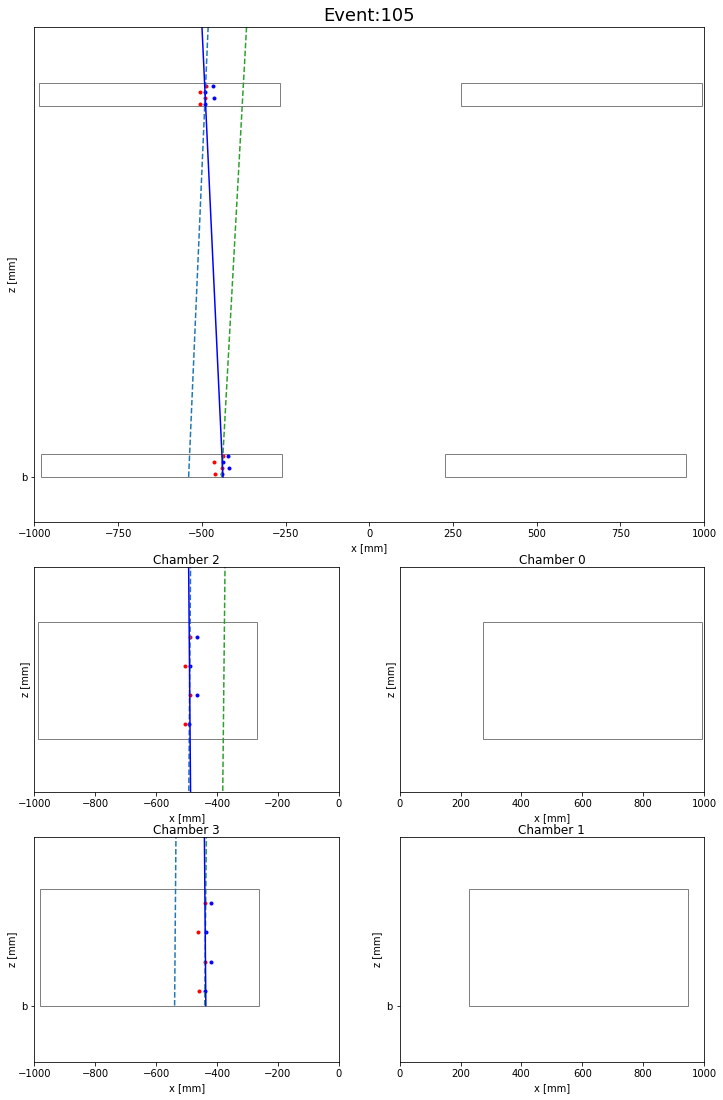

In [22]:
Make_Plot(Ev_list[100], calibration=True)